In [66]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_small.csv')
df.head(5)

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [ ]:
df.describe()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
count,2.380557e+06,2.380557e+06,2.380557e+06,122780.000000,123494.000000,2.380557e+06,2.380557e+06,2.380557e+06,2.377071e+06,2.380557e+06,2.380557e+06,1.854565e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,152107.000000,1.610221e+06,2.380557e+06,59010.000000,63662.000000,46401.000000,965758.000000,1.016116e+06,2.639700e+05,731551.000000,788086.000000,225486.000000,148194.000000,165281.000000,6.286100e+04,1.065082e+06,1.131440e+06,401164.000000,119637.000000,129892.000000,47961.000000,154468.000000,174850.000000,67832.000000,913495.000000,947465.000000,292700.000000,2.380557e+06,66388.000000,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,3.382814,178.094940,1.739159e+02,7.008190e+04,3.180607e+00,3.779416e+00,6.346880e-01,2.878558e+00,1.310325e-01,4.311779e+00,1.686763e+01,2.915203e+02,2.149237e-01,1.404642e+04,2.393825e+00,3.768373e+01,1.969876e+00,3.491460e-01,1.110318e+00,4.982662e-01,-24.398076,1.315759e+03,2.967369e-01,0.484138,0.027740,237.746471,0.043637,3.933803e-02,2.346923e+01,0.016820,0.058079,26.303225,-0.016074,0.096393,1.545803e+02,2.273252e-02,5.156084e-02,29.110785,0.130169,0.076156,17.196243,0.147856,0.083180,20.109919,-0.060010,0.009595,21.731093,4.456688e-02,383.229069,2.788759e-02
std,1.923719e+05,7.667827e+00,6.585934e+01,0.694562,108.568025,6.832483e+01,4.060398e+04,1.052086e+00,1.049727e+00,4.815176e-01,1.536947e+00,1.605939e-01,1.842699e+00,1.042970e+01,2.288292e+04,4.107695e-01,8.117353e+03,2.062891e+00,5.211484e+01,8.580772e-01,7.276573e-01,4.200432e-01,4.999971e-01,16.129689,2.029315e+03,4.568196e-01,0.642136,0.221842,1134.932987,0.447474,2.351395e-01,2.803530e+03,0.457709,0.296175,923.119202,0.576637,0.337104,5.834964e+03,5.205086e-01,2.678607e-01,1469.481661,0.561416,0.301031,29.536009,0.579293,0.317575,63.110961,0.469455,0.203876,800.608005,2.063509e-01,527.019882,1.646508e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000e+00,2.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.674260e+05,5.000000e+00,1.000000e+02,2.950000,111.090000,1.000000e+02,3.502800e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.910000e-02,4.440000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.115000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-31.267400,1.427400e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000e+00,7.000000e+00,0.000000,0.00000

In [ ]:
df.shape

(2380557, 54)

In [ ]:
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [ ]:
(df.isnull().sum()/len(df))*100

search_id                          0.000000
timestamp                          0.000000
site_id                            0.000000
user_country_id                    0.000000
user_hist_stars                   94.842384
user_hist_paid                    94.812391
listing_country_id                 0.000000
listing_id                         0.000000
listing_stars                      0.000000
listing_review_score               0.146436
is_brand                           0.000000
location_score1                    0.000000
location_score2                   22.095333
log_historical_price               0.000000
listing_position                   0.000000
price_usd                          0.000000
has_promotion                      0.000000
destination_id                     0.000000
length_of_stay                     0.000000
booking_window                     0.000000
num_adults                         0.000000
num_kids                           0.000000
num_rooms                       

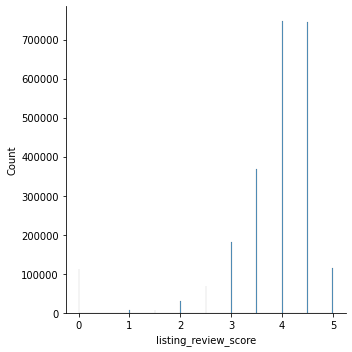

In [ ]:
sns.displot(df.listing_review_score)

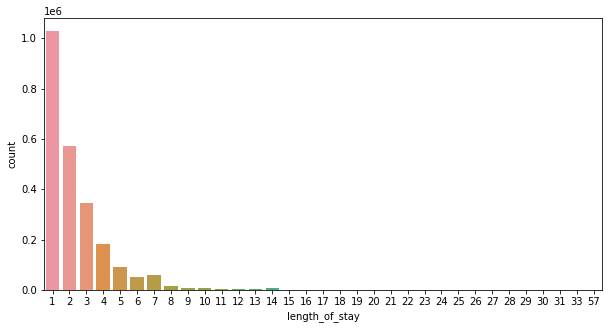

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data = df, x = 'length_of_stay')

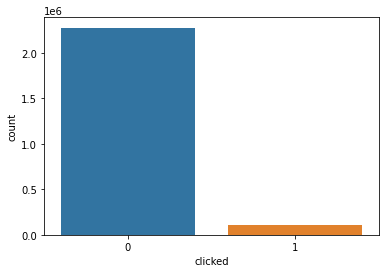

In [ ]:
sns.countplot(x= 'clicked' ,data=df)

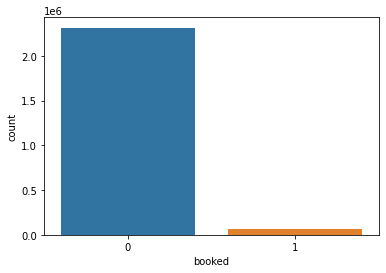

In [ ]:
sns.countplot(x= 'booked' ,data=df)

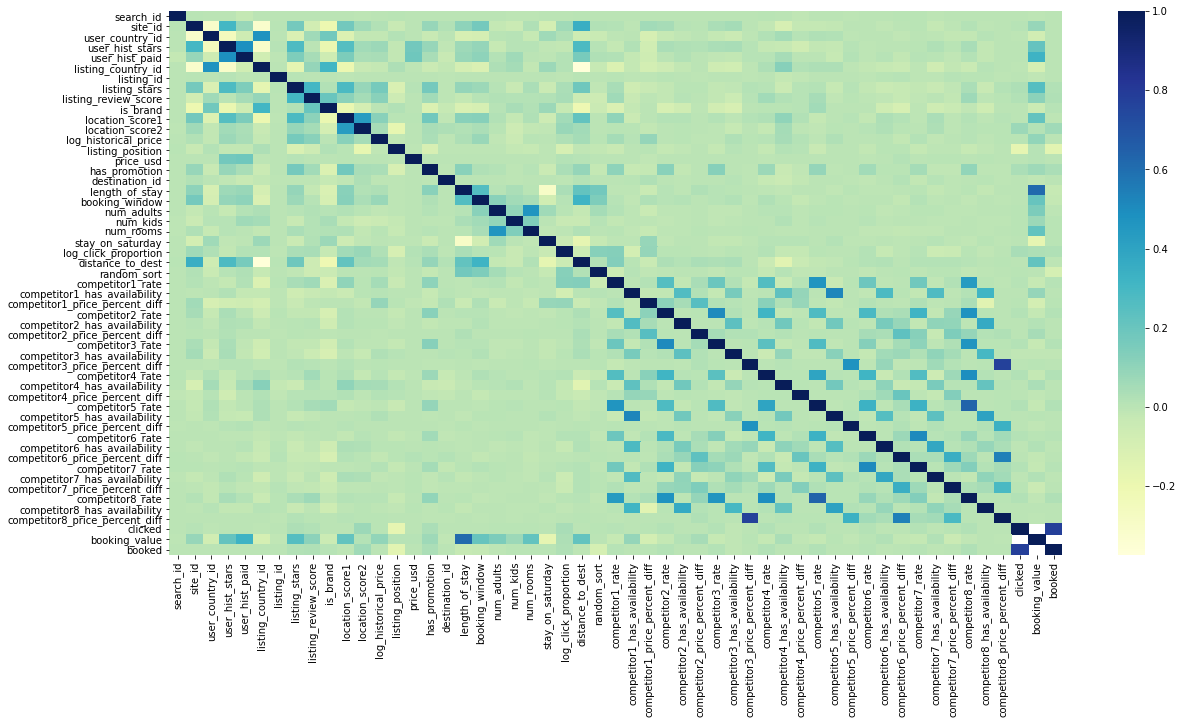

In [ ]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr() , cmap= 'YlGnBu' )

 >> CTR/Conversion Rate

In [ ]:
df.clicked.value_counts()

0    2274463
1     106094
Name: clicked, dtype: int64

In [ ]:
df.booked.value_counts()

0    2314169
1      66388
Name: booked, dtype: int64

In [ ]:
df.search_id.nunique()

95842

In [14]:
print(len(df[df.booked == 1]))

66388


In [12]:
print(len(df[df.clicked == 1]))

106094


In [13]:
len(df.search_id)

2380557

> Click through rate = no. of clicks/no. of impressions

In [102]:
CTR= ((len(df[df.clicked == 1]))/(len(df.search_id)))*100
print('Click_through_rate is: ', CTR)

Click_through_rate is:  4.45668807762217


> The Conversion Rate of a campaign or ad is the percentage of people who completed an action/purchase/conversion out of the number of people who could have completed it.

In [101]:
CnvR= (len(df[df.booked == 1])/len(df[df.clicked == 1]))*100
print('Conversion_rate is: ', CnvR)

Conversion_rate is:  62.5746979094011


In [104]:
x= df.groupby(['listing_stars','listing_review_score']).apply(lambda df: ((len(df[df.clicked == 1]))/(len(df.search_id))*100)).reset_index()
x.columns= ['listing_stars','listing_review_score','ctr']
x

,listing_stars,listing_review_score,ctr
0,0,0.0,1.656093
1,0,1.0,0.776699
2,0,1.5,1.482480
3,0,2.0,1.436206
4,0,2.5,1.602992
5,0,3.0,2.651770
6,0,3.5,2.933697
7,0,4.0,3.513557
8,0,4.5,4.108366
9,0,5.0,2.785164


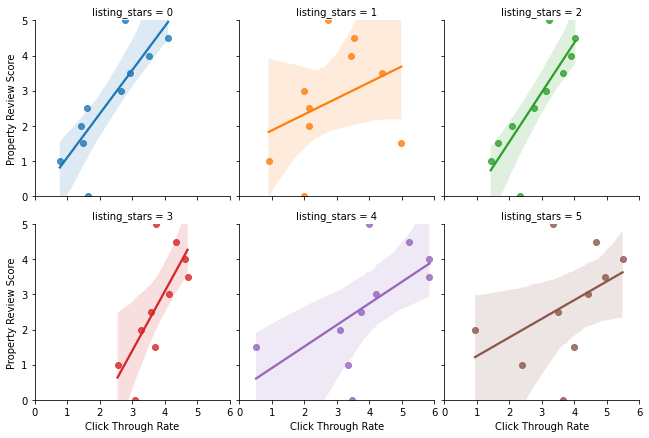

In [94]:
ctr_plot = sns.lmplot(x="ctr", y="listing_review_score", 
               col="listing_stars",hue="listing_stars",data=x,
               col_wrap=3, height=3).set_axis_labels("Click Through Rate", 
              "Property Review Score").set(xlim=(0, 6), ylim=(0, 5),
               xticks=[0,1,2,3,4,5,6], yticks=[0,1,2,3,4,5]).fig.subplots_adjust(wspace=.05)

In [108]:
y= df.groupby(['listing_stars','listing_review_score']).apply(lambda df: ((len(df[df.booked == 1]))/(len(df[df.clicked == 1]))*100)).reset_index()
y.columns= ['listing_stars','listing_review_score','conversion_rate']
y

,listing_stars,listing_review_score,conversion_rate
0,0,0.0,43.548387
1,0,1.0,37.500000
2,0,1.5,72.727273
3,0,2.0,34.883721
4,0,2.5,48.333333
5,0,3.0,55.837563
6,0,3.5,54.798762
7,0,4.0,61.035008
8,0,4.5,65.579710
9,0,5.0,50.251256


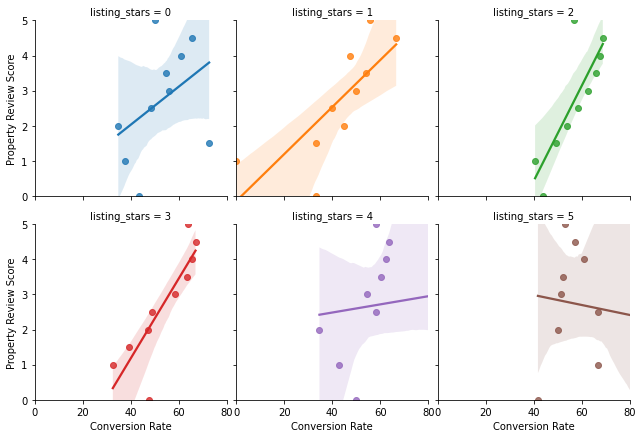

In [112]:
cnvr_plot = sns.lmplot(x="conversion_rate", y="listing_review_score", 
               col="listing_stars",hue="listing_stars",data=y,
               col_wrap=3, height=3).set_axis_labels("Conversion Rate", 
              "Property Review Score").set(xlim=(0, 80), ylim=(0, 5),
               xticks=[0,20,40,60,80,100], yticks=[0,1,2,3,4,5]).fig.subplots_adjust(wspace=.05)

**NaN value imputation**

In [90]:
df1= df.fillna(0)

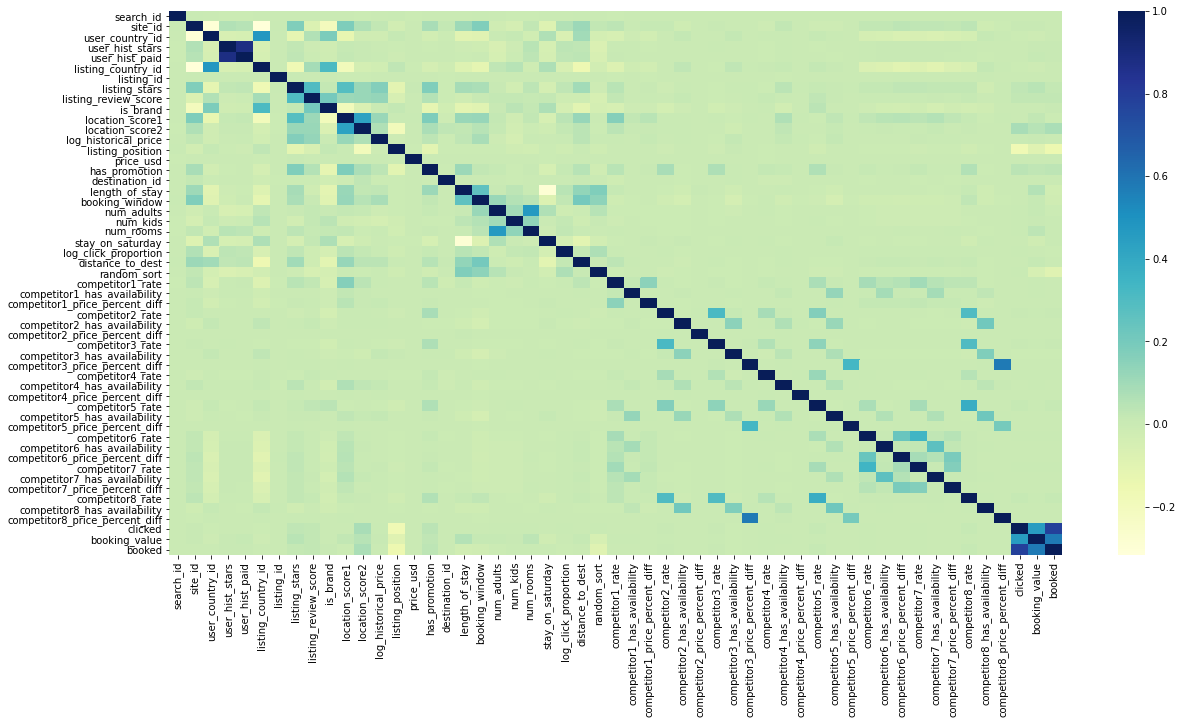

In [ ]:
plt.figure(figsize= (20,10))
sns.heatmap(df1.corr() , cmap= 'YlGnBu' )

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# df2 = df1._get_numeric_data()

# df2 = df2.drop(['booked'], axis = 1)

# vif = pd.DataFrame()

# vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]

# vif["features"] = df2.columns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# vif

,VIF Factor,features
0,3.815956,search_id
1,3.062162,site_id
2,10.666256,user_country_id
3,4.755085,user_hist_stars
4,4.671915,user_hist_paid
5,10.873156,listing_country_id
6,3.790378,listing_id
7,12.518729,listing_stars
8,15.082839,listing_review_score
9,3.355926,is_brand


Using statmodel logit function to generate a summary and remove independent variable with P-value of F statistics > 0.05 as they are plausible statistical insignficant features. Will help reducing no. of columns

# New Section

In [ ]:
X = df2.drop(['booked','timestamp','clicked','booking_value'], axis=1)
y= df2['booked']

In [ ]:
X

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff
0,4,5,219,0.0,0.0,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,0.0,238.35,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,5,219,0.0,0.0,219,11622,4,4.0,0,2.71,0.0000,5.64,36,299.0,0,12588,2,46,1,0,1,1,0.0,238.34,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,5,219,0.0,0.0,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,0.0,238.33,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,5,219,0.0,0.0,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,0.0,238.29,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,219,0.0,0.0,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,0.0,238.35,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380552,665573,5,219,0.0,0.0,219,117267,4,4.5,1,2.94,0.1153,5.91,15,259.0,1,7037,1,3,2,2,1,0,0.0,2563.84,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2380553,665573,5,219,0.0,0.0,219,125075,4,4.5,1,3.09,0.0304,6.21,8,349.0,0,7037,1,3,2,2,1,0,0.0,2558.31,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2380554,665573,5,219,0.0,0.0,219,127402,5,4.5,1,2.56,0.0483,6.21,16,429.0,0,7037,1,3,2,2,1,0,0.0,2560.30,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2380555,665573,5,219,0.0,0.0,219,128251,3,4.0,1,3.33,0.0410,5.63,6,175.0,1,7037,1,3,2,2,1,0,0.0,2557.77,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test= train_test_split(X,y,test_size = 0.001 , random_state= 100) #taking 0.001 as test set as want to get as much as data through logistic regression model to get a comprehensive summary

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [ ]:
import statsmodels.api as sm
# building the model and fitting the data
log_reg = sm.Logit(y_train,X_train).fit()

# printing the summary table
print(log_reg.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.107954
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                 booked   No. Observations:              2378176
Model:                          Logit   Df Residuals:                  2378126
Method:                           MLE   Df Model:                           49
Date:                Wed, 28 Jul 2021   Pseudo R-squ.:                  0.1522
Time:                        15:12:59   Log-Likelihood:            -2.5673e+05
converged:                       True   LL-Null:                   -3.0281e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0063      0.014     -0.451      0.652      -0.034       0.021
x2             0.0122      0

In [ ]:
X.iloc[:,[0,1,4,6,7,14,16,26,28,30,31,34,36,37,40,41,42,43,44,46,48,49]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   site_id                         int64  
 2   user_hist_paid                  float64
 3   listing_id                      int64  
 4   listing_stars                   int64  
 5   price_usd                       float64
 6   destination_id                  int64  
 7   competitor1_rate                float64
 8   competitor1_price_percent_diff  float64
 9   competitor2_has_availability    float64
 10  competitor2_price_percent_diff  float64
 11  competitor3_price_percent_diff  float64
 12  competitor4_has_availability    float64
 13  competitor4_price_percent_diff  float64
 14  competitor5_price_percent_diff  float64
 15  competitor6_rate                float64
 16  competitor6_has_availability    float64
 17  competitor6_price_percent_d

# Final Dataframe for computation

In [ ]:
df3= df1.copy(deep=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_country_id                 int64  
 4   user_hist_stars                 float64
 5   user_hist_paid                  float64
 6   listing_country_id              int64  
 7   listing_id                      int64  
 8   listing_stars                   int64  
 9   listing_review_score            float64
 10  is_brand                        int64  
 11  location_score1                 float64
 12  location_score2                 float64
 13  log_historical_price            float64
 14  listing_position                int64  
 15  price_usd                       float64
 16  has_promotion                   int64  
 17  destination_id             

In [ ]:
cols= [0,1,2,5,7,8,15,17,27,29,31,32,35,37,38,41,42,43,44,45,47,49,51,52]

In [ ]:
df3.iloc[:,cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   search_id                       int64  
 1   timestamp                       object 
 2   site_id                         int64  
 3   user_hist_paid                  float64
 4   listing_id                      int64  
 5   listing_stars                   int64  
 6   price_usd                       float64
 7   destination_id                  int64  
 8   competitor1_rate                float64
 9   competitor1_price_percent_diff  float64
 10  competitor2_has_availability    float64
 11  competitor2_price_percent_diff  float64
 12  competitor3_price_percent_diff  float64
 13  competitor4_has_availability    float64
 14  competitor4_price_percent_diff  float64
 15  competitor5_price_percent_diff  float64
 16  competitor6_rate                float64
 17  competitor6_has_availabilit

In [ ]:
df3= df1.drop(df1.columns[cols], axis = 1)

In [ ]:
df3.head()

,user_country_id,user_hist_stars,listing_country_id,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,has_promotion,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_has_availability,competitor2_rate,competitor3_rate,competitor3_has_availability,competitor4_rate,competitor5_rate,competitor5_has_availability,competitor7_has_availability,competitor8_rate,competitor8_price_percent_diff,booked
0,219,0.0,219,4.0,0,3.22,0.2544,5.98,21,0,2,46,1,0,1,1,0.0,238.35,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,219,0.0,219,4.0,0,2.71,0.0000,5.64,36,0,2,46,1,0,1,1,0.0,238.34,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,219,0.0,219,4.5,1,3.22,0.1924,6.10,22,1,2,46,1,0,1,1,0.0,238.33,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,219,0.0,219,4.0,0,3.26,0.3729,5.74,4,0,2,46,1,0,1,1,0.0,238.29,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,219,0.0,219,4.5,0,3.09,0.2508,6.21,26,0,2,46,1,0,1,1,0.0,238.35,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df3.shape

(2380557, 30)

In [ ]:
X = df3.drop(['booked'], axis=1)
y= df3['booked']

Splitting the dataset into train test split. Reason of taking test size 0.1 or even lower as test data will be used on the resampled train data which is much lesser than 10% split of original dataframe. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test= train_test_split(X,y,test_size = 0.1 , random_state= 321)

Using Random Undersampling trying to balance the dataset as well as reduce the volume of data to minimise execution time

In [ ]:
import imblearn
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=50, replacement=True)# fit predictor and target variable
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_train_rus))

original dataset shape: Counter({0: 2082701, 1: 59800})
Resample dataset shape Counter({0: 59800, 1: 59800})


Selecting Random Forest as algorithm of choice as it reduces overfitting of decision tree, normalisation not required and has built in feature importance helping with dimension reducing

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier() 
classifier_rf.fit(X_train_rus , y_train_rus)
y_pred = classifier_rf.predict(X_test)

In [ ]:
X_test.shape

(238056, 29)

In [ ]:
y_test

838826     0
2016190    0
1872205    0
121932     0
567217     0
          ..
1894320    0
1377118    0
679873     1
1699149    0
1539490    0
Name: booked, Length: 238056, dtype: int64

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, recall_score

In [ ]:
from sklearn import metrics

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85    231468
           1       0.08      0.75      0.14      6588

    accuracy                           0.74    238056
   macro avg       0.53      0.75      0.49    238056
weighted avg       0.97      0.74      0.83    238056



In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.

    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (7, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 9)
    plt.yticks(tick_marks, classes, size = 9)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 15,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 12)
    plt.xlabel('Predicted label', size = 12)

Confusion matrix, without normalization
[[171613  59855]
 [  1647   4941]]


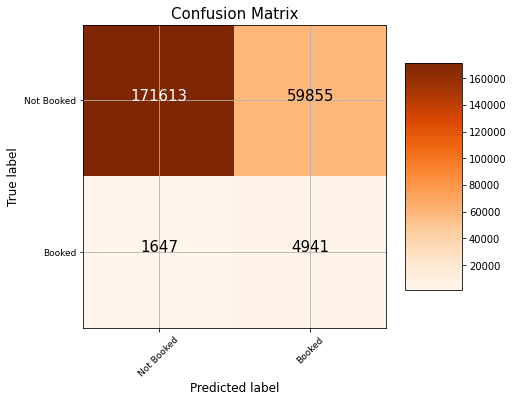

In [ ]:
cm =  metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes = ['Not Booked', 'Booked'], title = 'Confusion Matrix')

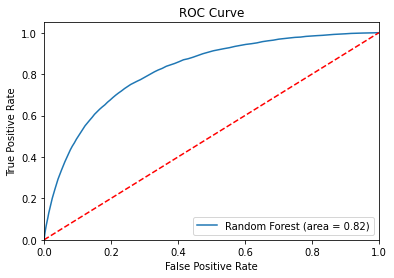

Random Forest AUC Score: 0.819721224498541


In [ ]:
rf_roc_auc = roc_auc_score(y_test,classifier_rf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, classifier_rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()
auc_score = metrics.roc_auc_score(y_test, classifier_rf.predict_proba(X_test)[:,1])
print("Random Forest AUC Score:",auc_score)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.13843438305502634

Feature Importance

In [ ]:
fi_model = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': classifier_rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
8,listing_position,0.219151
6,location_score2,0.109981
18,random_sort,0.079930
7,log_historical_price,0.077360
5,location_score1,0.076239
11,booking_window,0.073692
17,distance_to_dest,0.068685
3,listing_review_score,0.033769
2,listing_country_id,0.032433
0,user_country_id,0.031879


Optimising Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 321)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 5, 
                        n_iter = 10, verbose = 1, random_state= 321)

# Fit 
rs.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rs.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 0.6,
 'max_leaf_nodes': 44,
 'min_samples_split': 5,
 'n_estimators': 149}

In [ ]:
best_model = rs.best_estimator_

In [ ]:
y_pred_rs = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rs))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85    231468
           1       0.08      0.75      0.14      6588

    accuracy                           0.74    238056
   macro avg       0.53      0.75      0.49    238056
weighted avg       0.97      0.74      0.83    238056



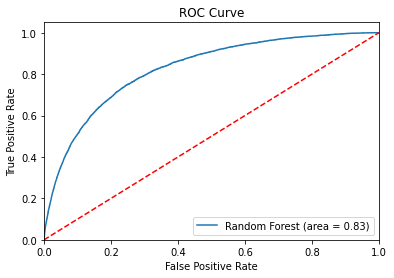

Random Forest AUC Score: 0.8251388301838306


In [ ]:
rf_roc_auc = roc_auc_score(y_test,best_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()
auc_score = metrics.roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1])
print("Random Forest AUC Score:",auc_score)